# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v.022020
- author: marcusRB
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

```
####
In this version I use only few feature, I try an another cleansing method.
I use same ML algorithms
####

```

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 2.2.2
pandas: 1.0.0
sklearn: 0.19.1


In [ ]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

***

## Import Libraries

In [64]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

***

## Load dataset

Kaggle we provide two datasets: train and test in csv extension. So, we check and analyze only train file.

In [7]:
# Load dataset train and test
train_titanic = pd.read_csv('titanic_train.csv')
test_titanic = pd.read_csv('titanic_test.csv')

# Create titanis list with both dataset to use same cleansing methods
titanic_list = [train_titanic, test_titanic]

***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [8]:
# Check dataframe structure
for information in titanic_list:
    information.info()
    print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
# Check dataframe basic stats data
for stats in titanic_list:
    print(stats)
    print('_'*40)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
# Check test dataframe basic stats data
for descrip in titanic_list:
    print(descrip.describe())
    print('_'*40)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
________________________________________
       PassengerId      Pclass         A

***

### EDA, Visualization and transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [11]:
# Check null and NA values for both dataset
for nuls in titanic_list:
    print(nuls.isna().sum())
    print('_'*40)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
________________________________________


In [12]:
# Table of relative frequency
for nuls in titanic_list:
    print(nuls.isnull().sum()/len(nuls)*100)
    print('_'*40)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
________________________________________
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64
________________________________________


We need to check those 3 features, but it must probable remove `Cabin`, there are many null values.

#### `PassangerId`
Id of the passenger. We remove it because haven't predictive weight on our model.

In [13]:
# Check first 10 elements
for passenger in titanic_list:
    print(passenger['PassengerId'].head(10))
    print('_'*40)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64
________________________________________
0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64
________________________________________


In [14]:
# Remove PassengerId variable only for train dataset
titanic_list[0].drop(['PassengerId'], axis=1, inplace=True)

In [15]:
# Check train dataset
titanic_list[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### `Survived`

This is our depedent variable or predictor, it check if passenger survived (`1`) or not (`0`). Almost 38% of passenger survived.

/Users/Marco/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


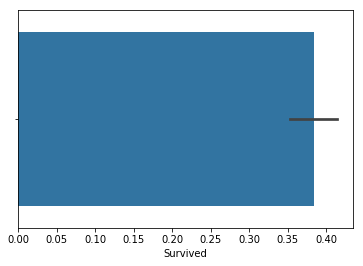

In [16]:
sns.barplot(x="Survived", data=titanic_list[0])

In [17]:
titanic_list[0].describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### `Pclass`

Ticket class. This is a categorical feature with 3 different values, first class, second class and third class. Exist high correlation between this feature with dependent variable.

In [18]:
titanic_list[0][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/Users/Marco/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


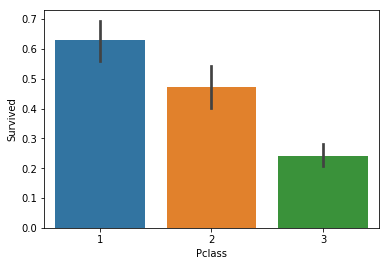

In [19]:
sns.barplot(x="Pclass", y="Survived", data=titanic_list[0])

#### `Sex`

Passenger genre. It's a categorical feature with two values, `male` y `female`. We converted it a dummy or binary value.

In [20]:
# Check the survived ratio with sex
titanic_list[0][["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


/Users/Marco/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


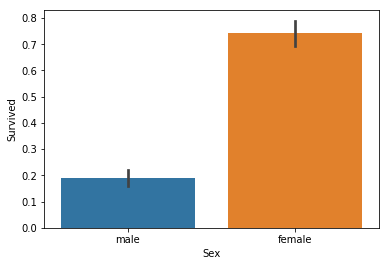

In [21]:
sns.barplot(x="Sex", y="Survived", data=titanic_list[0])

In [22]:
# Convert categorical variable to binary variable - female 1 and male 0
for genre in titanic_list:
    genre['Sex'] = genre['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [19]:
# Check Sex features
titanic_list[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_list[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


#### `SibSp`

Numerical feature. Indicate a sibling of passenger.

In [23]:
titanic_list[0][["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


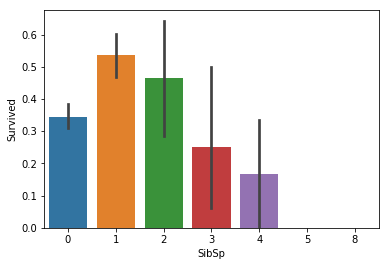

In [22]:
sns.barplot(x="SibSp", y="Survived", data=titanic_list[0])

#### `Parch`

Father and childs of passenger. Numerical variable

In [23]:
titanic_list[0][["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


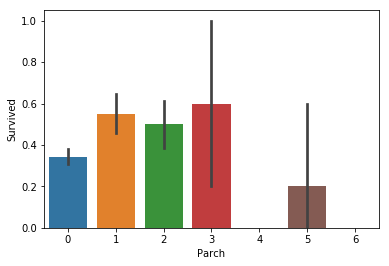

In [24]:
sns.barplot(x="Parch", y="Survived", data=titanic_list[0])

#### `FamilySize`

Create new feature, called FamilySize, where we summarize `SibSp` and `Parch` as numerical variable.

In [24]:
# Create a new feature
for famsize in titanic_list:
    famsize['FamilySize'] = famsize['SibSp'] + famsize['Parch'] + 1

In [26]:
titanic_list[0][["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


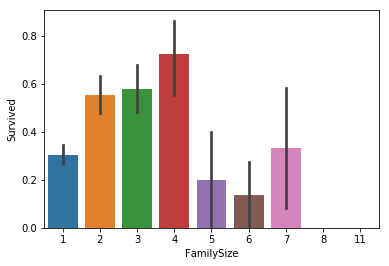

In [27]:
sns.barplot(x="FamilySize", y="Survived", data=titanic_list[0])

#### `IsAlone`

We create new feature caracterized if passanger travel alone or not, based on familySize. The binary feature is called `IsAlone`.

In [25]:
for alone in titanic_list:
    alone['IsAlone'] = 0
    alone.loc[alone['FamilySize'] == 1, 'IsAlone'] = 1

# Check new feature with predictor    
titanic_list[0][['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


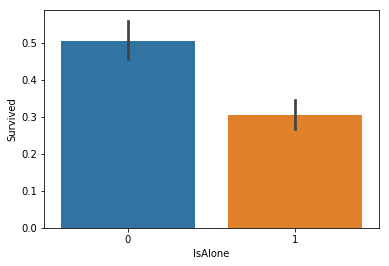

In [29]:
sns.barplot(x="IsAlone", y="Survived", data=titanic_list[0])

In [30]:
# Check new features in dataset train
titanic_list[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3,0


#### `Ticket`

Ticket number of the passanger. In first instance isn't important for the model. We removed it.

In [26]:
# We remove Ticket variable in both traing and test dataset
for tick in titanic_list:
    tick.drop(['Ticket'], axis=1, inplace=True)

In [32]:
# We check the dataset again - train
titanic_list[0].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1
5,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,NaN,Q,1,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,E46,S,1,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,NaN,S,5,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,NaN,S,3,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,NaN,C,2,0


In [33]:
# ...and test dataset
titanic_list[1].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,NaN,S,3,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,9.2250,NaN,S,1,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,7.6292,NaN,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,29.0000,NaN,S,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,7.2292,NaN,C,1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,24.1500,NaN,S,3,0


### `Embarked`

This feature is Port of Embarkation. There are three categorical variables: `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [34]:
# Check ratio Embarked and Survived variable
titanic_list[0][['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [27]:
# Fill na or null values with the most frequent value, C
freq_port = titanic_list[0].Embarked.dropna().mode()[0]
freq_port

'S'

In [28]:
# Assign result on the dataset
for port in titanic_list:
    port['Embarked'] = port['Embarked'].fillna(freq_port)

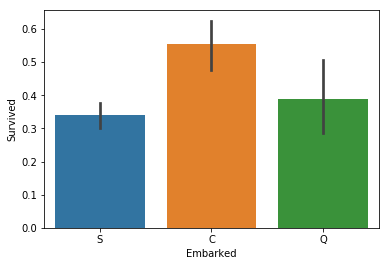

In [37]:
sns.barplot(x="Embarked", y="Survived", data=titanic_list[0])

#### `Fare`

This continuous numerical variable is ticket fare of the passenger.

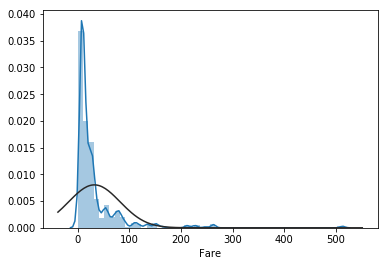

In [38]:
sns.distplot(titanic_list[0]['Fare'], fit=norm)

After check the variable, has a normal distribution. We apply a logarithm to normalize. 

/Users/Marco/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Marco/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


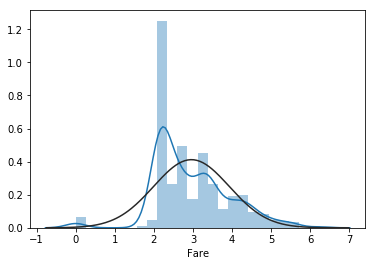

In [29]:
for f in titanic_list:
    f['Fare'] = np.log1p(f['Fare'])
sns.distplot(titanic_list[0]['Fare'], fit=norm)

We transform to categorical variable

In [30]:
for faregr in titanic_list:
    faregr['FareGroup'] = pd.qcut(faregr['Fare'], 7, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])


titanic_list[0][['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.207143
1,B,0.200000
2,C,0.316327
3,D,0.406250
4,E,0.445312
5,F,0.456000
6,G,0.685039


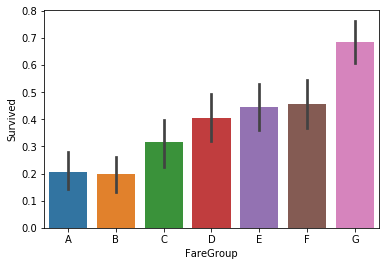

In [41]:
sns.barplot(x="FareGroup", y="Survived", data=titanic_list[0])

In [31]:
# We remove the variable Fare
for fares in titanic_list:
    fares.drop(['Fare'], axis=1, inplace=True)

#### `Cabin`

We transform this feature in binary variable, so it inform if he was or not in the cabin.

In [32]:
for cab in titanic_list:
    cab['InCabin'] = ~cab['Cabin'].isnull()

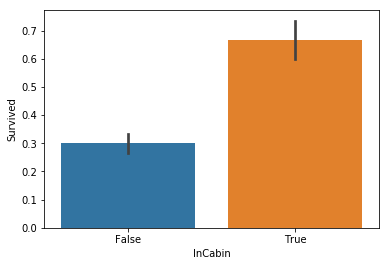

In [44]:
sns.barplot(x="InCabin", y="Survived", data=titanic_list[0])
plt.show()

In [33]:
# We remove the variable Cabin
for cabin in titanic_list:
    cabin.drop(['Cabin'], axis=1, inplace=True)

#### `Age`

Numerical variable with age of the passenger. We transform in categorical variable and grouped.

In [34]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
for age in titanic_list:
    age["Age"] = age["Age"].fillna(-0.5)
    age['AgeGroup'] = pd.cut(age["Age"], bins, labels = labels)

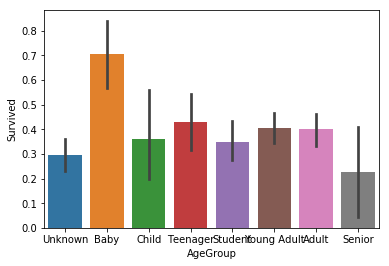

In [47]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_list[0])
plt.show()

In [48]:
# We remove the variable Age
#for a in titanic_list:
#    a.drop(['Age'], axis=1, inplace=True)

#### `Name`

Categorical variable with the name of the passenger. We extract from title names like as `Mr`, `Miss` or `Master`.

In [49]:
# Check the names
titanic_list[0]['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [35]:
# Create the function to extract the title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply get_title function
for title in titanic_list:
    title['Title'] = title['Name'].apply(get_title)

# Check the results
pd.crosstab(titanic_list[0]['Title'], titanic_list[0]['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Create groups for all frequents titles and the other will be `Rare`.

In [36]:
# Create a categorization on train dataset
for t in titanic_list:
    t['Title'] = t['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    t['Title'] = t['Title'].replace('Mlle', 'Miss')
    t['Title'] = t['Title'].replace('Ms', 'Miss')
    t['Title'] = t['Title'].replace('Mme', 'Mrs')

# We create a relative table
titanic_list[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


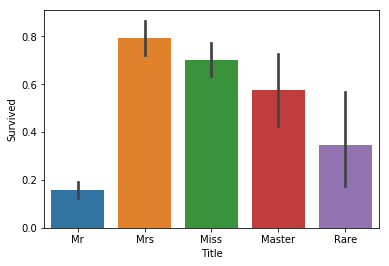

In [52]:
sns.barplot(x="Title", y="Survived", data=titanic_list[0])
plt.show()

In [37]:
# Remove Name variable
for name in titanic_list:
    name.drop(['Name'], axis=1, inplace=True)

In [54]:
# Check all values and new features
titanic_list[0].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,AgeGroup,Title
0,0,3,0,22.0,1,0,S,2,0,A,False,Student,Mr
1,1,1,1,38.0,1,0,C,2,0,G,True,Adult,Mrs
2,1,3,1,26.0,0,0,S,1,1,B,False,Young Adult,Miss
3,1,1,1,35.0,1,0,S,2,0,F,True,Young Adult,Mrs
4,0,3,0,35.0,0,0,S,1,1,B,False,Young Adult,Mr
5,0,3,0,-0.5,0,0,Q,1,1,C,False,Unknown,Mr
6,0,1,0,54.0,0,0,S,1,1,F,True,Adult,Mr
7,0,3,0,2.0,3,1,S,5,0,E,False,Baby,Master
8,1,3,1,27.0,0,2,S,3,0,C,False,Young Adult,Mrs
9,1,2,1,14.0,1,0,C,2,0,F,False,Teenager,Mrs


In [55]:
titanic_list[1].head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,AgeGroup,Title
0,892,3,0,34.5,0,0,Q,1,1,B,False,Young Adult,Mr
1,893,3,1,47.0,1,0,S,2,0,A,False,Adult,Mrs
2,894,2,0,62.0,0,0,Q,1,1,C,False,Senior,Mr
3,895,3,0,27.0,0,0,S,1,1,C,False,Young Adult,Mr
4,896,3,1,22.0,1,1,S,3,0,C,False,Student,Mrs
5,897,3,0,14.0,0,0,S,1,1,C,False,Teenager,Mr
6,898,3,1,30.0,0,0,Q,1,1,A,False,Young Adult,Miss
7,899,2,0,26.0,1,1,S,3,0,F,False,Young Adult,Mr
8,900,3,1,18.0,0,0,C,1,1,A,False,Teenager,Mrs
9,901,3,0,21.0,2,0,S,3,0,E,False,Student,Mr


## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

Si visualizamos la matriz de correlación entre las variables, vemos que las mas correlacionadas con la que queremos predecir son `Sex`, `Pclass` i `isAlone`.

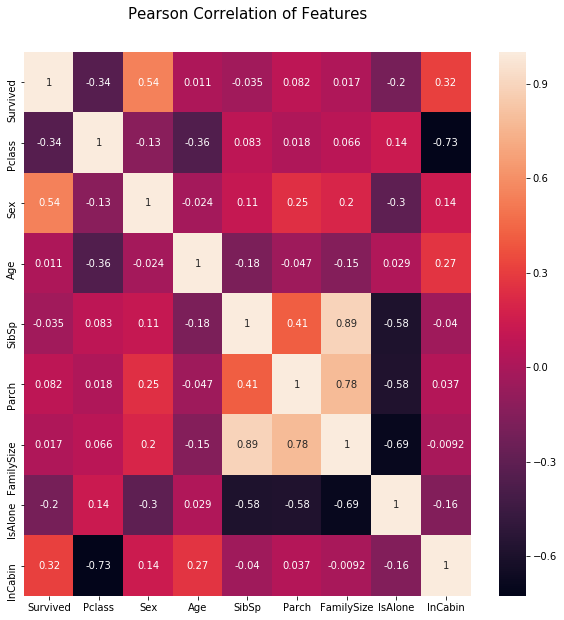

In [38]:
correlation_matrix = titanic_list[0].corr()
correlation_matrix

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [39]:
# The procedure is very simple, binarizing categorical variable for training dataset
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title']
titanic_categorical = titanic_list[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
train_titanic = pd.concat([titanic_list[0][titanic_list[0].columns[~titanic_list[0].columns.isin(cols)]], titanic_categorical], axis=1)
train_titanic.head()

,Survived,Sex,Age,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,1,0,2,0,False,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,1,38.0,1,0,2,0,True,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,26.0,0,0,1,1,False,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,35.0,1,0,2,0,True,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,1,1,False,0,0,...,0,0,1,0,0,0,0,1,0,0


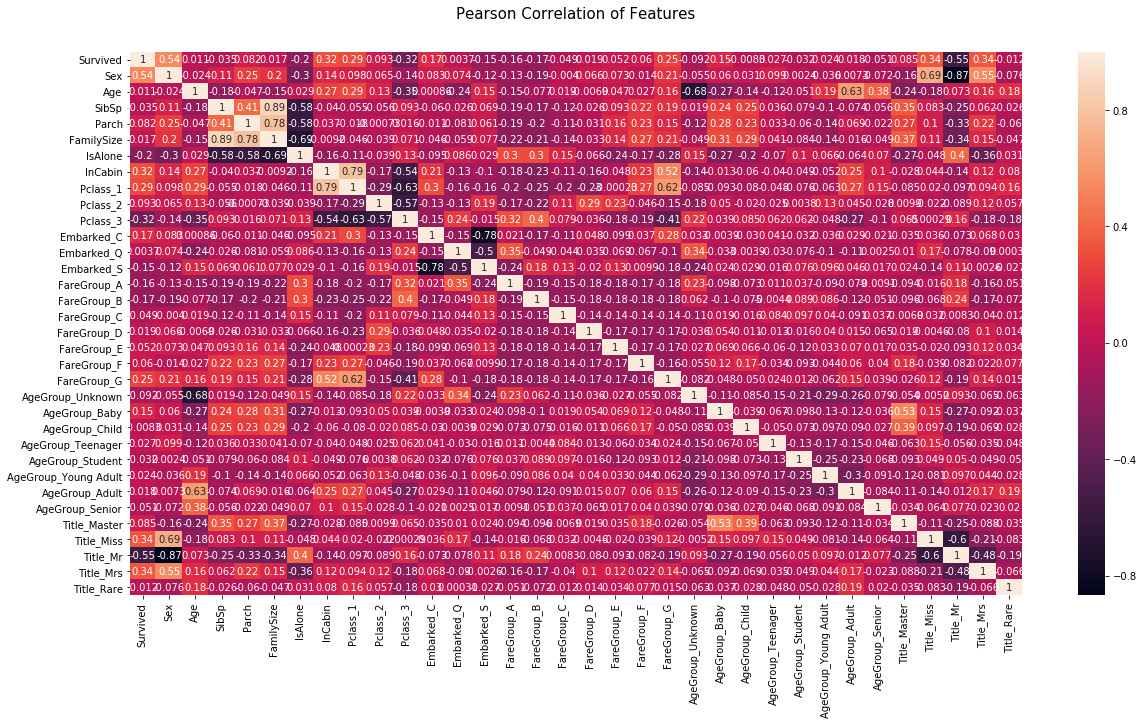

In [58]:
correlation_matrix = train_titanic.corr()
correlation_matrix

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

In [40]:
# Binarizing variable for testing dataset
titanic_categorical = titanic_list[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
test_titanic = pd.concat([titanic_list[1][titanic_list[1].columns[~titanic_list[1].columns.isin(cols)]], titanic_categorical], axis=1)
test_titanic.head()

,PassengerId,Sex,Age,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,34.5,0,0,1,1,False,0,0,...,0,0,1,0,0,0,0,1,0,0
1,893,1,47.0,1,0,2,0,False,0,0,...,0,0,0,1,0,0,0,0,1,0
2,894,0,62.0,0,0,1,1,False,0,1,...,0,0,0,0,1,0,0,1,0,0
3,895,0,27.0,0,0,1,1,False,0,0,...,0,0,1,0,0,0,0,1,0,0
4,896,1,22.0,1,1,3,0,False,0,0,...,0,1,0,0,0,0,0,0,1,0


## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

In [41]:
# Backup train and test dataset
train_bak = train_titanic
test_bak = test_titanic

In [84]:
train_titanic = train_bak
test_titanic = test_bak

In [86]:
train_titanic.head(10)

,Survived,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,2,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,1,2,0,True,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,2,0,True,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,0,1,1,False,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,1,True,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,0,0,5,0,False,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,1,3,0,False,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9,1,1,2,0,False,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [85]:
test_titanic.head(10)

,PassengerId,Sex,Age,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,34.5,1,1,False,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,893,1,47.0,2,0,False,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,894,0,62.0,1,1,False,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,0,27.0,1,1,False,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,896,1,22.0,3,0,False,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,897,0,14.0,1,1,False,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6,898,1,30.0,1,1,False,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7,899,0,26.0,3,0,False,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,900,1,18.0,1,1,False,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
9,901,0,21.0,3,0,False,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [92]:
 test_titanic.drop(['Age'], axis=1, inplace=True)

In [89]:
# Version 1 
# Modeling with only high correlation features - Drop SibSb - Parch
for feature in train_titanic, test_titanic:
    feature.drop(['SibSp'], axis=1, inplace=True)
    feature.drop(['Parch'], axis=1, inplace=True)
    feature.drop(['Age'], axis=1, inplace=True)

KeyError: "['SibSp'] not found in axis"

In [93]:
train_titanic.head(10)

,Survived,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,2,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,1,2,0,True,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,2,0,True,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,0,1,1,False,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,1,True,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,0,0,5,0,False,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,1,3,0,False,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9,1,1,2,0,False,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [94]:
test_titanic.head(10)

,PassengerId,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,1,1,False,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,893,1,2,0,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,894,0,1,1,False,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,895,0,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,896,1,3,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,897,0,1,1,False,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
6,898,1,1,1,False,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
7,899,0,3,0,False,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,900,1,1,1,False,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
9,901,0,3,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [95]:
# Split and drop Survived variable
X_train = train_titanic.drop('Survived', axis=1)
Y_train = train_titanic['Survived']

/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

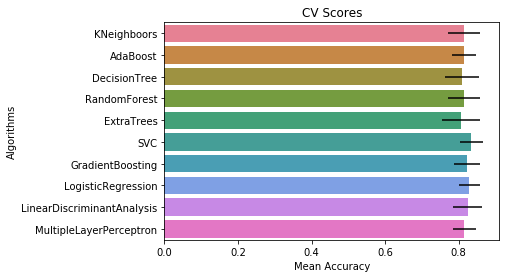

In [96]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, Y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [97]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.82222222 0.81111111 0.74157303 0.83146067 0.86516854 0.83146067
 0.80898876 0.79775281 0.87640449 0.84090909]


82.27

In [98]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  5.0min finished


0.8226711560044894

In [99]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

[0.8        0.82222222 0.7752809  0.87640449 0.83146067 0.78651685
 0.80898876 0.78651685 0.88764045 0.875     ]


82.5

In [100]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

0.8249158249158249

In [101]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8        0.84444444 0.78651685 0.85393258 0.82022472 0.79775281
 0.83146067 0.82022472 0.86516854 0.875     ]


82.95

In [102]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 744 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 1744 tasks      | elapsed:   22.8s


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear]

[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:   23.7s finished


0.8305274971941639

In [103]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.82222222 0.8        0.70786517 0.83146067 0.84269663 0.79775281
 0.79775281 0.76404494 0.87640449 0.82954545]


80.7

In [104]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  3.7min finished


0.8406285072951739

In [105]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.66666667 0.68888889 0.76404494 0.78651685 0.73033708 0.76404494
 0.78651685 0.71910112 0.83146067 0.80681818]


75.44

In [106]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.83333333 0.86666667 0.78651685 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85227273]


83.5

In [107]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.3s finished


0.8451178451178452

In [108]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                           ('svc', SVMC_best)],
                           voting='soft', n_jobs = 4)

# 82.97%
# VotingPredictor = VotingClassifier(estimators =
#                            [ ('rfc', RFC_best), 
#                             ('svc', SVMC_best),
#                             ('gbc', GBC_best),
#                             ('lda', LDA_best),
#                             ('lrm', LRM_best)],
#                            voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future th

[0.82222222 0.84444444 0.74157303 0.86516854 0.91011236 0.82022472
 0.82022472 0.80898876 0.85393258 0.84090909]
83.28


In [109]:
test_titanic.head(10)

,PassengerId,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,0,1,1,False,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,893,1,2,0,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,894,0,1,1,False,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,895,0,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,896,1,3,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,897,0,1,1,False,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
6,898,1,1,1,False,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
7,899,0,3,0,False,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,900,1,1,1,False,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
9,901,0,3,0,False,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [110]:
# Drop PassengerId variable on test dataset
ids = test_titanic[['PassengerId']] # create a sub-dataset for submission file and saving it 
test_titanic = test_titanic.drop('PassengerId', axis=1).copy()

In [112]:
test_titanic.head(10)

,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,1,False,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1,2,0,False,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,1,1,False,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,1,False,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,3,0,False,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,0,1,1,False,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
6,1,1,1,False,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7,0,3,0,False,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8,1,1,1,False,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9,0,3,0,False,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [111]:
# Create the model for submission
Predictive_Model = pd.DataFrame({
        "PassengerId": ids,
        "Survived": VotingPredictor.predict(test_titanic)})

Predictive_Model.to_csv('titanic_model.csv', index=False)

/Users/Marco/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ValueError: Shape of passed values is (1, 2), indices imply (418, 2)

## Predictive Modeling

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.



```
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
```

In [45]:
# Split and drop Survived variable
X_train = train_titanic.drop('Survived', axis=1)
y_train = train_titanic['Survived']

# Drop PassengerId variable on test dataset
ids = test_titanic[['PassengerId']] # create a sub-dataset for submission file and saving it 
test_titanic = test_titanic.drop('PassengerId', axis=1).copy()

# Create train and test 80-20 with seed fixed to 42 for validation the model
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 31), (712,), (179, 31), (179,))

In [47]:
X_train.head()

,Sex,Age,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
331,0,45.5,1,1,True,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
733,0,23.0,1,1,False,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
382,0,32.0,1,1,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
704,0,26.0,2,0,False,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
813,1,6.0,7,0,False,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [49]:
X_test.head()

,Sex,Age,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
709,0,-0.5,3,0,False,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
439,0,31.0,1,1,False,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
840,0,20.0,1,1,False,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
720,1,6.0,2,0,False,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39,1,14.0,2,0,False,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [50]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

We have prepared our dataset and ready for to apply algorithms to predict variable `Survived`:

- Logistic Regression
- Decision Tree
- Random Forests
- k-nearest neigbours
- Support Vector Machines

We use two metrics: confusion matrix and ROC curve. Only for the Kaggle competition also compare the results with AUC performance.

In [70]:
# Create a performance_auc dict
performance_auc = {}

### Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

source [wikipedia - Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [71]:
model = LogisticRegression().fit(X_train, y_train)
model

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [73]:
# Confidence score
logreg_score = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score)

print(classification_report(y_test, predicted_log))

84.55
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

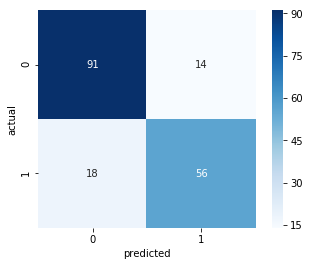

In [74]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

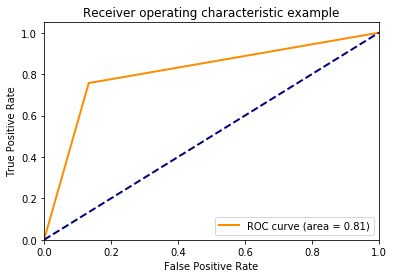

In [75]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.


In [76]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
predicted_dt = model.predict(X_test)
predicted_dt

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [78]:
# Confidence score
dectree_score = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score)
print(classification_report(y_test, predicted_dt))

96.35
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

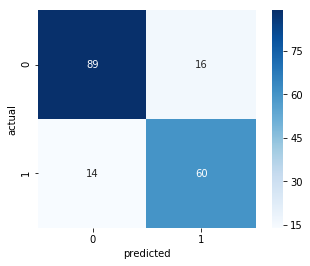

In [79]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

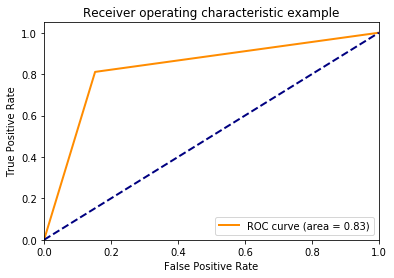

In [80]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [81]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
28,Title_Mrs,0.330214
1,FamilySize,0.177343
7,Embarked_C,0.104846
2,IsAlone,0.088010
30,NaN,0.037406
4,Pclass_1,0.029024
23,AgeGroup_Adult,0.025748
9,Embarked_S,0.022063
11,FareGroup_B,0.021141
10,FareGroup_A,0.020562


### Random forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [82]:
model = RandomForestClassifier(1000).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
predicted_rf = model.predict(X_test)
predicted_rf

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [84]:
# Confidence score
randfor_score = round(model.score(X_train,y_train) * 100, 2)
print(randfor_score)
print(classification_report(y_test, predicted_rf))

96.35
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

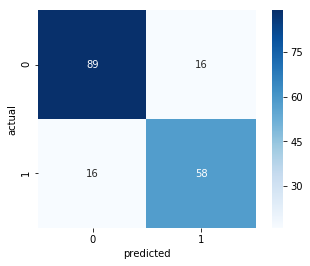

In [85]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

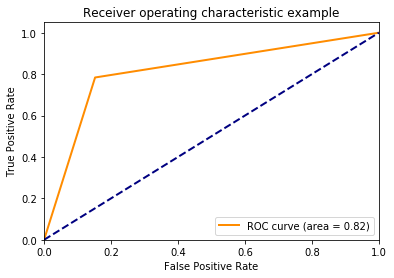

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [87]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
1,FamilySize,0.180931
0,Age,0.122050
28,Title_Mrs,0.120000
2,IsAlone,0.068367
7,Embarked_C,0.048505
29,Title_Rare,0.047090
4,Pclass_1,0.042025
27,Title_Mr,0.035328
16,FareGroup_G,0.022971
6,Pclass_3,0.021546


### k-nearest neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source [wikipedia - k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [88]:
model = KNeighborsClassifier(3).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [89]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1])

In [90]:
# Confidence score
knn_score = round(model.score(X_train,y_train) * 100, 2)
print(knn_score)
print(classification_report(y_test, predicted_knn))

86.24
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

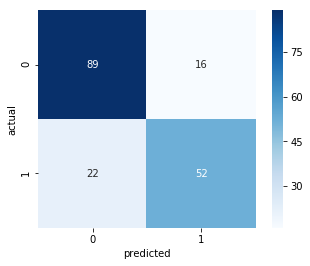

In [91]:
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

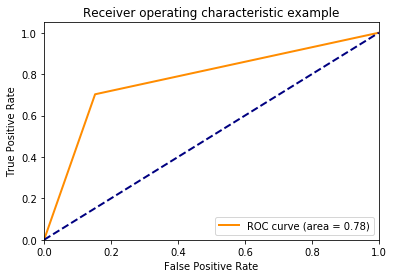

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

source [wikipedia - SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

In [93]:
model = SVC(probability=True).fit(X_train, y_train)
model

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
predicted_sv = model.predict(X_test)
predicted_sv

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [95]:
# Confidence score
svm_score = round(model.score(X_train,y_train) * 100, 2)
print(svm_score)
print(classification_report(y_test, predicted_sv))

83.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

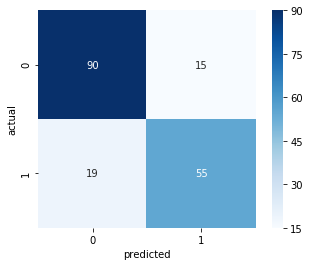

In [96]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

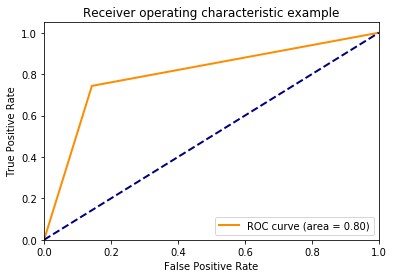

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.


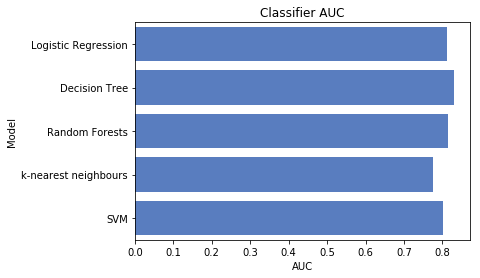

In [98]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [svm_score, 
              knn_score, 
              logreg_score, 
              randfor_score,
              dectree_score ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.35
4,Decision Tree,96.35
1,KNN,86.24
2,Logistic Regression,84.55
0,Support Vector Machines,83.85


## Kaggle Submission

### Test made and submitted with Random forest model and SVM with 79% accuracy